In [43]:
import http.client
import json

conn = http.client.HTTPSConnection("currency-conversion-and-exchange-rates.p.rapidapi.com")

headers = {
    'X-RapidAPI-Key': "8bf6b1dd1emshe95f677573566b7p1fa061jsnc212c734cd58",
    'X-RapidAPI-Host': "currency-conversion-and-exchange-rates.p.rapidapi.com"
}
datefrom = input("Enter the start date '[yyyy-mm-dd]' :")
dateend = input("Enter the end date '[yyyy-mm-dd]' :")


Enter the start date '[yyyy-mm-dd]' :2021-01-02
Enter the end date '[yyyy-mm-dd]' :2021-05-02


In [44]:
conn.request("GET", "/timeseries?start_date="+datefrom+"&end_date="+dateend+"&from=INR&to=USD", headers=headers)

res = conn.getresponse()
data = res.read()

d = json.loads(data)
print(d["rates"][datefrom])

{'ANG': 2.189058, 'SVC': 10.671089, 'CAD': 1.545939, 'XCD': 3.279544, 'MVR': 18.692437, 'HRK': 7.498706, 'AUD': 1.577368, 'MWK': 940.043336, 'XAG': 0.046135, 'MAD': 10.833028, 'PHP': 58.363319, 'NAD': 17.82677, 'GNF': 12188.944511, 'KES': 133.169934, 'MZN': 90.895663, 'BTN': 89.105826, 'MGA': 4659.83963, 'AZN': 2.067767, 'XAU': 0.000641, 'RON': 4.833496, 'CHF': 1.080106, 'EGP': 19.224997, 'BSD': 1.21951, 'TWD': 34.061772, 'GGP': 0.887288, 'LVL': 0.734034, 'MMK': 1619.503275, 'WST': 3.094623, 'ILS': 3.899, 'BHD': 0.457503, 'GBP': 0.887515, 'TZS': 2813.544218, 'SDG': 67.046315, 'LAK': 11335.336895, 'DJF': 215.663661, 'BYN': 3.186325, 'LBP': 1843.919618, 'RWF': 1208.542273, 'PEN': 4.414578, 'EUR': 1, 'ZMK': 10922.958707, 'RSD': 116.799808, 'INR': 88.697431, 'MUR': 48.180484, 'BWP': 13.176773, 'GEL': 3.986396, 'KMF': 489.040842, 'UZS': 12776.664085, 'RUB': 89.732289, 'CUC': 1.2135, 'BGN': 1.944517, 'JOD': 0.860419, 'NGN': 462.590644, 'BDT': 103.231184, 'PKR': 195.364774, 'BRL': 6.302195, '

In [45]:
import matplotlib.pyplot as plt
visual = dict(d["rates"][datefrom])
print(visual)

{'ANG': 2.189058, 'SVC': 10.671089, 'CAD': 1.545939, 'XCD': 3.279544, 'MVR': 18.692437, 'HRK': 7.498706, 'AUD': 1.577368, 'MWK': 940.043336, 'XAG': 0.046135, 'MAD': 10.833028, 'PHP': 58.363319, 'NAD': 17.82677, 'GNF': 12188.944511, 'KES': 133.169934, 'MZN': 90.895663, 'BTN': 89.105826, 'MGA': 4659.83963, 'AZN': 2.067767, 'XAU': 0.000641, 'RON': 4.833496, 'CHF': 1.080106, 'EGP': 19.224997, 'BSD': 1.21951, 'TWD': 34.061772, 'GGP': 0.887288, 'LVL': 0.734034, 'MMK': 1619.503275, 'WST': 3.094623, 'ILS': 3.899, 'BHD': 0.457503, 'GBP': 0.887515, 'TZS': 2813.544218, 'SDG': 67.046315, 'LAK': 11335.336895, 'DJF': 215.663661, 'BYN': 3.186325, 'LBP': 1843.919618, 'RWF': 1208.542273, 'PEN': 4.414578, 'EUR': 1, 'ZMK': 10922.958707, 'RSD': 116.799808, 'INR': 88.697431, 'MUR': 48.180484, 'BWP': 13.176773, 'GEL': 3.986396, 'KMF': 489.040842, 'UZS': 12776.664085, 'RUB': 89.732289, 'CUC': 1.2135, 'BGN': 1.944517, 'JOD': 0.860419, 'NGN': 462.590644, 'BDT': 103.231184, 'PKR': 195.364774, 'BRL': 6.302195, '

In [46]:
labels = input("Enter currency codes separated by commas: ").split(',')
values = [visual[label.strip()] for label in labels]
labels

Enter currency codes separated by commas: USD,AUD,CAD


['USD', 'AUD', 'CAD']

In [47]:
conn.request("GET", "/symbols", headers=headers)

res = conn.getresponse()
data = res.read()

d2 = json.loads(data)
d2 = d2["symbols"]   

countrynames = [d2[code.strip()] for code in labels]
countrynames

['United States Dollar', 'Australian Dollar', 'Canadian Dollar']

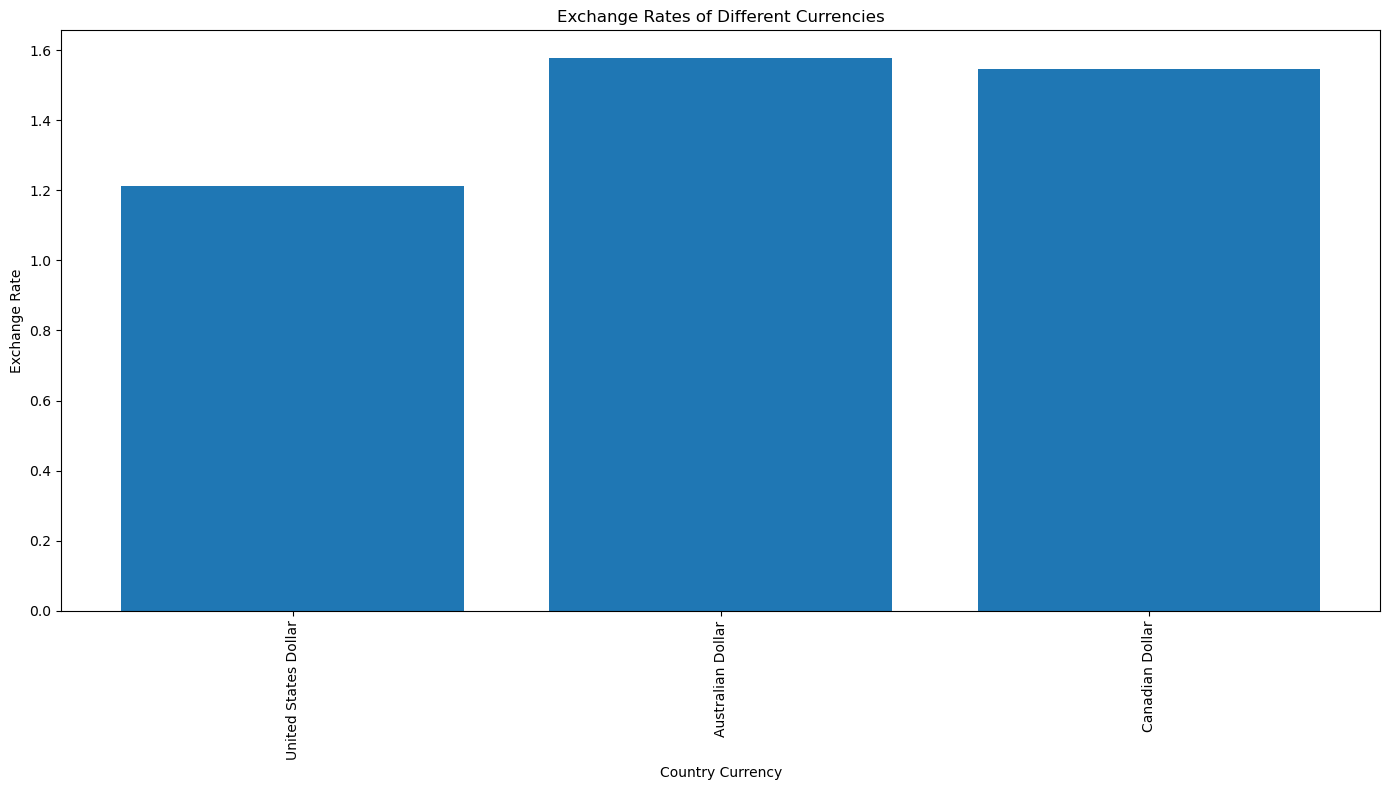

In [48]:
# Plotting the graph
plt.figure(figsize=(14, 8))
plt.bar(countrynames, values)
plt.xlabel('Country Currency')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rates of Different Currencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [49]:
fromcode = str(input("Enter your Country Code :"))
tocode = str(input("Enter converting Country Code :"))
amount = str(input("Enter the amount :"))
conn.request("GET", "/convert?from="+fromcode+"&to="+tocode+"&amount="+amount, headers=headers)
res = conn.getresponse()
data = res.read()


Enter your Country Code :USD
Enter converting Country Code :INR
Enter the amount :10


In [51]:
d3 = json.loads(data)
print(d3["result"])

834.0295
